# Data Challenge : Historical consumption regression for electricity supply pricing
-----------------------------
### __Catboost predictions__

In [14]:
import numpy as np# linear algebra
import math
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import catboost regressor
from catboost import CatBoostRegressor


from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt


# local import
from model import preprocessing

In [15]:
## Importing data

plt.style.use('fivethirtyeight')
figparams = {'figsize':(20,8), 'lw':0.8}
#Import training data
inputFilePath = "./input_training_ssnsrY0.csv"
data_train = pd.read_csv(inputFilePath, delimiter = ',', skiprows = 0, index_col=[0])
id_train=data_train.timestamp

#Import testing data
inputFilePathTest = "./input_test_cdKcI0e.csv"
data_test = pd.read_csv(inputFilePathTest, delimiter = ',', skiprows = 0, index_col=[0])
id_test = data_test.index
# import targets
outputFilePath = "./output_training_Uf11I9I.csv"
y_data = pd.read_csv(outputFilePath, delimiter = ',', skiprows = 0, index_col=[0])

In [16]:
## data preprocessing and split
data=preprocessing.Data(data_train,data_test,y_data)
data.data_preprocessing()
X_train1,X_train2,X_test1,X_test2=data.get_data_split()
y_train1,y_train2=data.get_split_y_data()

C:\Users\youss\Desktop\docs_ml\time series\model\util\need.py:17: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


# Location 1

### Features selection

In [17]:
features_lm_loc1 =['hour',"isWeekend",'isHoliday','dayofweek','month','weekofyear','consumption_secondary_1', 
                   'consumption_secondary_2','consumption_secondary_3','temp_1','humidity_1'] 
X_train1 = data.data_train[features_lm_loc1]

### Model 1

In [19]:
model1 = CatBoostRegressor(
    iterations=1000,
    random_seed=12,
    logging_level='Silent',
    loss_function='MAE'
)

model1.fit(
    X_train1, y_train1,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Generating predictions

<AxesSubplot:xlabel='timestamp'>

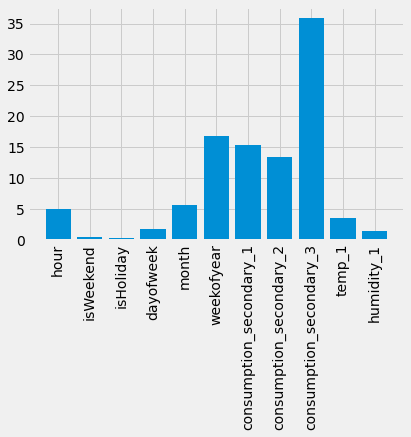

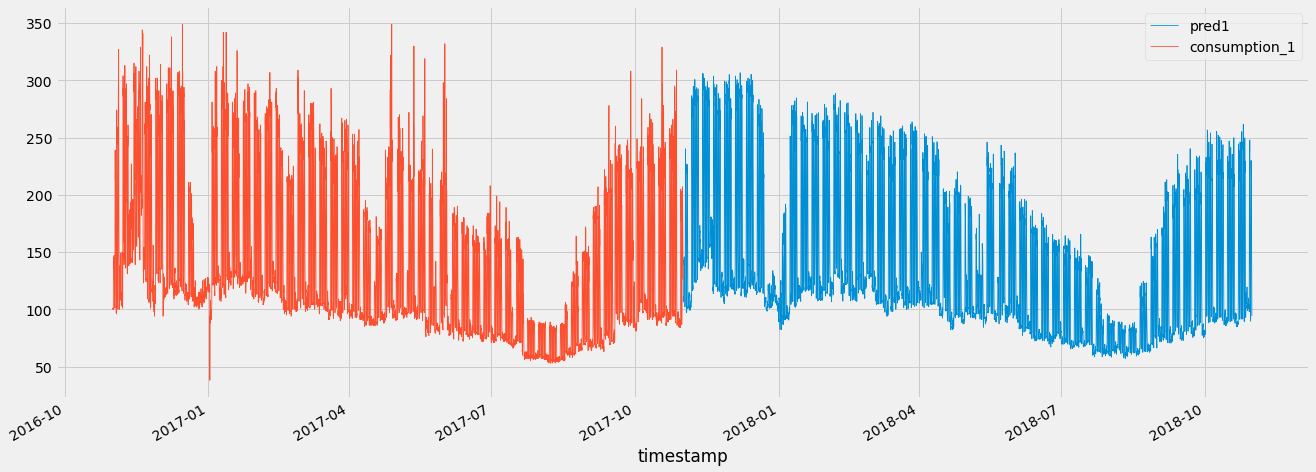

In [20]:
# predictions
pred1 = model1.predict(X_test1)
pred1_df = pd.DataFrame(pred1, index = data.data_test.index, columns=['pred1'])

# plotting coefficients' importances
plt.bar(features_lm_loc1, model1.feature_importances_)
plt.xticks(rotation=90)

# plotting predictions
pred1_df.plot(**figparams, legend=True)
y_train1.plot(**figparams, legend=True)

# Location 2

### Features selection

In [21]:
features_lm_loc2 =['hour','isWeekend','isHoliday','dayofweek','month','weekofyear','consumption_secondary_1',
                   'consumption_secondary_2','consumption_secondary_3','temp_2_smooth7D','humidity_2_smooth7D'] 

#training data
X_train2 = data.data_train[features_lm_loc2]

### Model 2

In [23]:
model2 = CatBoostRegressor(
    iterations=300,
    random_seed=12,
    logging_level='Silent',
    loss_function='MAE'
)

model2.fit(
    X_train2, y_train2,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### Generating predictions

<AxesSubplot:xlabel='timestamp'>

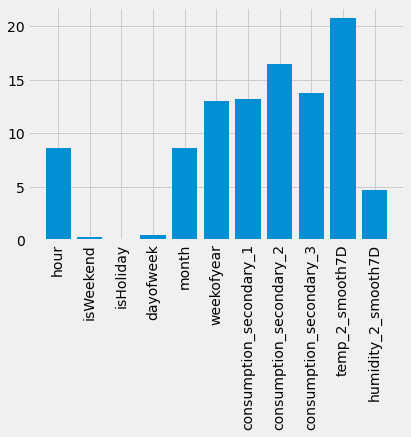

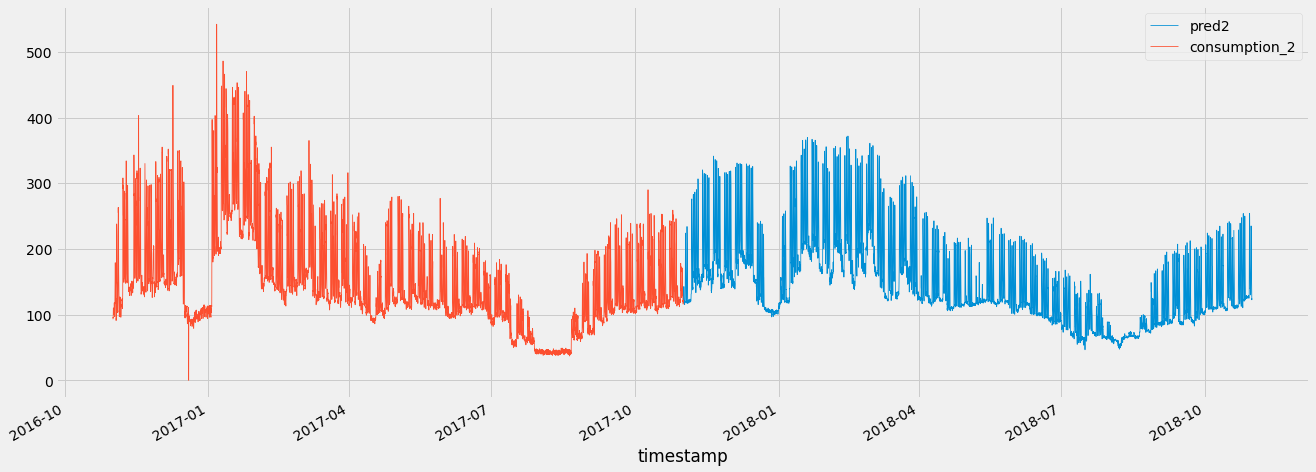

In [24]:
# predictions
pred2 = model2.predict(X_test2)
pred2_df = pd.DataFrame(pred2, index = data.data_test.index, columns=['pred2'])

# plotting coefficients' importances
plt.bar(features_lm_loc2, model2.feature_importances_)
plt.xticks(rotation=90)

# plotting predictions
pred2_df.plot(**figparams, legend=True)
y_train2.plot(**figparams, legend=True)

# Submission

In [25]:
sub_cb = pd.concat([pred1_df.round(1),pred2_df.round(1)], axis=1).set_index(id_test)
sub_cb.to_csv('submission.csv') 

### Public Score:
Weighted Mean Absolute Error = 18.61